# Численное интегрирование

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Во всех задачах требуется используя формулу прямоугольников, трапеции и Симпсона вычислить приближенное значение интеграла. Исследовать зависимость ошибки вычислений от шага сетки. </p>

$$
\begin{equation}
f(x) = \frac{1}{1 + e^x}, \ \ \ {x \in [-1, 1]}
\end{equation}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return 1 / (1 + np.exp(x))

# интеграл на малом промежутке от xk до xk+1
def f_integral(x0, x1):
    return np.log(np.exp(x1 - x0) * (1 + np.exp(x0)) / (1 + np.exp(x1)))

In [3]:
# интерал исходной функции на заданном интервале

integral_correct = np.log(np.exp(2) * (1 + np.exp(-1)) / (1 + np.exp(1)))

# интервал
a = -1
b = 1

integral_correct

1.0

In [4]:
x0_plot = np.linspace(a, b, 10)
y0_plot = [f(x) for x in x0_plot]

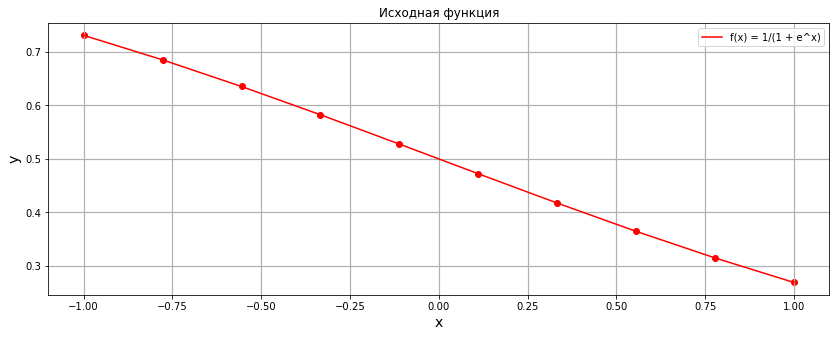

In [5]:
# график исходной функии
fig, ax  = plt.subplots(figsize=(14, 5))

ax.scatter(x0_plot, y0_plot, color="red")
ax.plot(x0_plot, y0_plot, color="red", label='f(x) = 1/(1 + e^x)')

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.title("Исходная функция")
plt.legend()

plt.show()


### Вычисления

#### Интеграл

In [6]:
def rectangle_method(x_plot):
    result = 0
    error = 0    

    for i in range(0, len(x_plot) - 1):
        h = x_plot[i + 1] - x_plot[i]
        x = x_plot[i]
        integral = f(x + h / 2) * h
        
        error += abs(f_integral(x, x + h) - integral)
        result += integral
        
    return result, error


def trapezoid_method(x_plot):
    result = 0
    error = 0   
    
    for i in range(0, len(x_plot) - 1):
        h = x_plot[i + 1] - x_plot[i]
        x = x_plot[i]
        integral = (f(x + h) + f(x)) * h / 2 
        
        error += abs(f_integral(x, x + h) - integral)
        result += integral
    
    return result, error
    
    
def Simpson_method(x_plot):
    result = 0
    error = 0   
    
    for i in range(0, len(x_plot) - 1):
        h = x_plot[i + 1] - x_plot[i]
        x = x_plot[i]
        integral = h / 6 * (f(x) + 4 * f(x + h/2) + f(x + h))
        
        error += abs(f_integral(x, x + h) - integral)
        result += integral
        
    return result, error


def Gauss_method(x_plot):
    result = 0
    error = 0   
    
    x1 = (-1) / np.power(3, 1 / 2)
    x2 = 1 / np.power(3, 1 / 2)
        
    for i in range(0, len(x_plot) - 1):
        h = x_plot[i + 1] - x_plot[i]
        a = x_plot[i]
        
        y1 = a + h / 2 + h / 2 * x1
        y2 = a + h / 2 + h / 2 * x2
    
        integral = h / 2 * (f(y1) + f(y2))
        
        error += abs(f_integral(a, a + h) - integral)
        result += integral
    
    return result, error

In [7]:
index = {'index': ['integral', 'error'] }

d_methods = {'Rectangle_method': rectangle_method(x0_plot), 
             'Trapezoid_method': trapezoid_method(x0_plot),
             'Simpson_method':   Simpson_method(x0_plot),  
             'Gauss_method':     Gauss_method(x0_plot), 
      }

index = pd.DataFrame(index)
df_methods = pd.DataFrame(data=d_methods)
df_i = pd.concat([index, df_methods], axis=1)

print('Integral_correct:', integral_correct, 
      '\nStep:', x0_plot[1] -  x0_plot[0],
     )
df_i

Integral_correct: 1.0 
Step: 0.2222222222222222


,index,Rectangle_method,Trapezoid_method,Simpson_method,Gauss_method
0,integral,1.000000,1.000000,1.000000e+00,1.000000e+00
1,error,0.000217,0.000434,1.500006e-07,1.000333e-07


#### Ошибки

In [8]:
# количество узлов сетки

node_min_count = 2
node_max_count = 1000

In [9]:
# вычисление ошибок

h_plot = []
rectangle_results ,rectangle_errors = [], []
trapezoid_results, trapezoid_errors = [], []
Simpson_results, Simpson_errors = [], []
Gauss_results, Gauss_errors = [], []

for n in np.arange(node_min_count, node_max_count + 1, step=10):    
    
    x1_plot, h = np.linspace(a, b, n, retstep=True)
    
    rectangle_result, rectangle_error = rectangle_method(x1_plot)
    trapezoid_result, trapezoid_error = trapezoid_method(x1_plot)
    Simpson_result, Simpson_error = Simpson_method(x1_plot)
    Gauss_result, Gauss_error = Gauss_method(x1_plot)
    
    rectangle_results.append(rectangle_result)
    trapezoid_results.append(trapezoid_result)
    Simpson_results.append(Simpson_result)
    Gauss_results.append(Gauss_result)
    
    rectangle_errors.append(rectangle_error)
    trapezoid_errors.append(trapezoid_error)
    Simpson_errors.append(Simpson_error)
    Gauss_errors.append(Gauss_error)
    
    h_plot.append(h)

In [10]:
d = {'Step': h_plot, 
     
     'I_rectangle_method': rectangle_results,
     'R_rectangle_method': rectangle_errors,
     
     'I_trapezoid_method': trapezoid_results, 
     'R_trapezoid_method': trapezoid_errors,
     
     'I_Simpson_method':   Simpson_results,   
     'R_Simpson_method':   Simpson_errors,
     
     'I_Gauss_method':     Gauss_results,
     'R_Gauss_method':     Gauss_errors
    }

print('Integral_correct:', integral_correct)

df = pd.DataFrame(data=d)
df.loc[0:10]
# df

Integral_correct: 1.0


,Step,I_rectangle_method,R_rectangle_method,I_trapezoid_method,R_trapezoid_method,I_Simpson_method,R_Simpson_method,I_Gauss_method,R_Gauss_method
0,2.000000,1.0,0.000000,1.0,0.000000,1.0,0.000000e+00,1.0,0.000000e+00
1,0.181818,1.0,0.000146,1.0,0.000292,1.0,6.749511e-08,1.0,4.500664e-08
2,0.095238,1.0,0.000040,1.0,0.000081,1.0,5.111738e-09,1.0,3.408032e-09
3,0.064516,1.0,0.000018,1.0,0.000037,1.0,1.077780e-09,1.0,7.185381e-10
4,0.048780,1.0,0.000011,1.0,0.000021,1.0,3.523978e-10,1.0,2.349364e-10
5,0.039216,1.0,0.000007,1.0,0.000014,1.0,1.472220e-10,1.0,9.815276e-11
6,0.032787,1.0,0.000005,1.0,0.000010,1.0,7.194283e-11,1.0,4.796346e-11
7,0.028169,1.0,0.000004,1.0,0.000007,1.0,3.920004e-11,1.0,2.613689e-11
8,0.024691,1.0,0.000003,1.0,0.000005,1.0,2.314801e-11,1.0,1.542397e-11
9,0.021978,1.0,0.000002,1.0,0.000004,1.0,1.453201e-11,1.0,9.681932e-12


In [15]:
column = df['I_Gauss_method']

for element in column:
    print(element)

1.0
1.0
1.0
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999994
0.9999999999999999
1.0000000000000004
0.9999999999999998
1.0000000000000002
1.0000000000000002
0.9999999999999996
0.9999999999999998
0.9999999999999996
0.9999999999999999
1.0000000000000002
1.0000000000000004
1.0000000000000004
1.0000000000000002
0.9999999999999996
1.0
1.0000000000000002
1.0000000000000004
1.0
1.0000000000000002
1.0
0.9999999999999999
0.9999999999999998
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999998
1.000000000000001
0.9999999999999999
1.0000000000000002
1.0
0.9999999999999989
0.9999999999999994
0.9999999999999993
1.0000000000000002
0.9999999999999997
1.0000000000000009
1.0
0.9999999999999993
0.9999999999999993
1.0000000000000002
1.0000000000000002
0.9999999999999991
0.9999999999999996
1.0000000000000002
0.9999999999999996
0.9999999999999991
0.9999999999999999
0.9999999999999992
0.9999999999999993
1.0000000000000002
0.9999999999999993
1.0000000000000002
1.00000

#### Вычисление коэффициентов (МНК для линейной регрессии)

In [12]:
ln_h_plot = np.log(h_plot[1:])

ln_rectangle_errors = np.log(rectangle_errors[1:])
ln_trapezoid_errors = np.log(trapezoid_errors[1:])
ln_Simpson_errors   = np.log(Simpson_errors[1:])
ln_Gauss_errors     = np.log(Gauss_errors[1:])

ln_errors = [ln_rectangle_errors, ln_trapezoid_errors, ln_Simpson_errors, ln_Gauss_errors]
b         = [0, 0, 0, 0]

for b_index in range(len(b)):
    
    for index in range(len(ln_h_plot)):
        b[b_index] += ln_h_plot[index] * ln_errors[b_index][index]
    b[b_index] *= len(ln_h_plot)
        
    b[b_index] -= (np.sum(ln_h_plot) * np.sum(ln_errors[b_index]))
    b[b_index] /= (len(ln_h_plot) * np.sum(np.power(ln_h_plot, 2)) - np.power(np.sum(ln_h_plot), 2))

b

[1.9995001930055, 1.9994571311749385, 2.6474179065800643, 2.4760765907700257]

In [13]:
# сравнение с прошлым методом вычисления коэффициентов

l = len(ln_h_plot) - 1

k1 = (ln_rectangle_errors[l] - ln_rectangle_errors[0]) / (ln_h_plot[l] - ln_h_plot[0])
k2 = (ln_trapezoid_errors[l] - ln_trapezoid_errors[0]) / (ln_h_plot[l] - ln_h_plot[0])
k3 = (ln_Simpson_errors[l]   - ln_Simpson_errors[0])   / (ln_h_plot[l] - ln_h_plot[0])
k4 = (ln_Gauss_errors[l]     - ln_Gauss_errors[0])     / (ln_h_plot[l] - ln_h_plot[0])

print(k1, k2, k3, k4)

1.9982036269652055 1.9980485524675446 2.965899073714897 2.8748399559946596


#### Графики ошибок

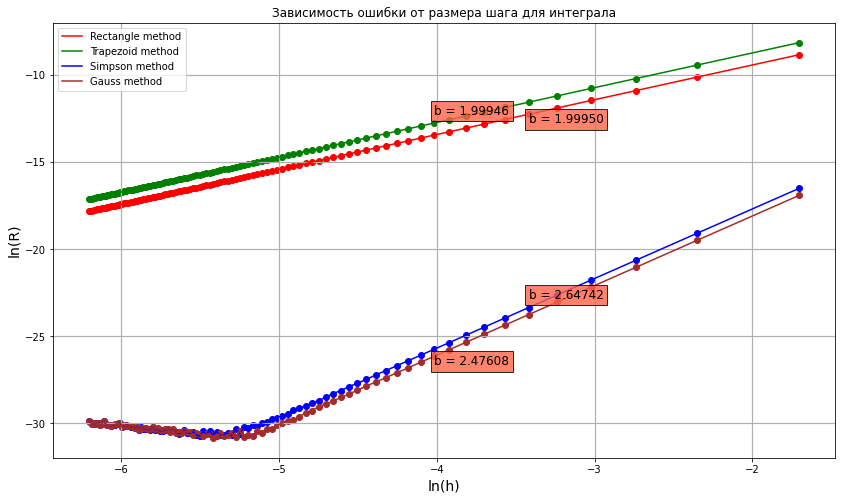

In [14]:
# график зависимости ошибки от размера шага для интеграла

fig, ax = plt.subplots(figsize=(14, 8))

props = dict(boxstyle='square', facecolor='tomato', alpha=0.8)

ax.scatter(ln_h_plot, ln_rectangle_errors, color="red")
ax.plot(ln_h_plot, ln_rectangle_errors, color="red", label='Rectangle method')
plt.text(ln_h_plot[5], ln_rectangle_errors[5] - 0.5, "b = {0:.5f}".format(b[0]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot, ln_trapezoid_errors, color="green")
ax.plot(ln_h_plot, ln_trapezoid_errors, color="green", label='Trapezoid method')
plt.text(ln_h_plot[10], ln_trapezoid_errors[10] + 0.5, "b = {0:.5f}".format(b[1]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot, ln_Simpson_errors, color="blue")
ax.plot(ln_h_plot, ln_Simpson_errors, color="blue", label='Simpson method')
plt.text(ln_h_plot[5], ln_Simpson_errors[5] + 0.5, "b = {0:.5f}".format(b[2]), fontsize = 12, bbox=props)

ax.scatter(ln_h_plot, ln_Gauss_errors, color="brown")
ax.plot(ln_h_plot, ln_Gauss_errors, color="brown", label='Gauss method')
plt.text(ln_h_plot[10], ln_Gauss_errors[10] - 0.5, "b = {0:.5f}".format(b[3]), fontsize = 12, bbox=props)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("ln(h)", fontsize=14)        
ax.set_ylabel("ln(R)", fontsize=14)

plt.title("Зависимость ошибки от размера шага для интеграла")
plt.legend()

plt.show()